# Decision Tree (CART)

### Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot

#For test-train split
from sklearn.model_selection import train_test_split

#For fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#For fitting regression tree
from sklearn.tree import DecisionTreeRegressor

#To create a confusion matrix
from sklearn.metrics import confusion_matrix

#For plotting a decision tree
from sklearn import tree

## Classification Tree

### Data

In [2]:
#Reading the data
iris = pd.read_csv(r"C:\Users\moran\Desktop\Datasets\iris.csv")

In [3]:
#The first few observtions of the data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Separating the Target and the Predictors

In [8]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris['Species']

### Train-Test Split (Stratified Sampling of Y)

In [9]:
#Train-Test Split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 100)

In [10]:
#Train-Validation Split
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train, test_size = 0.25, stratify=y_train, random_state = 100)

In [11]:
#Checks
#Proportion in training data
y_train.value_counts()/len(y_train)

virginica     0.333333
versicolor    0.333333
setosa        0.333333
Name: Species, dtype: float64

In [12]:
#Proportion in test data
y_test.value_counts()/len(y_test)

versicolor    0.333333
virginica     0.333333
setosa        0.333333
Name: Species, dtype: float64

In [13]:
#Proportion in valid data
y_valid.value_counts()/len(y_valid)

setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: Species, dtype: float64

### Decision tree classifier with criterion gini index

In [14]:
clf_gini = DecisionTreeClassifier(criterion = "gini", max_depth=2, min_samples_leaf=5, random_state = 100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, random_state=100)

In [15]:
from sklearn import tree
import matplotlib.pyplot as plt

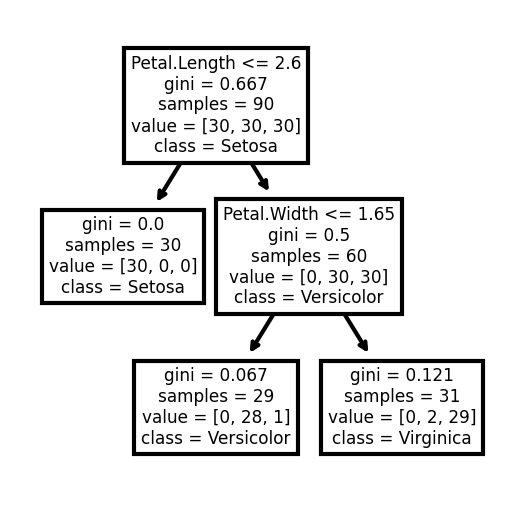

In [16]:
fig, axes = plt.subplots(figsize=(2,2), dpi=300)


tree.plot_tree(clf_gini, feature_names=list(X), 
               class_names=["Setosa", "Versicolor", "Virginica"],
               filled = False)

plt.show()

In [25]:
#Decision Tree
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=100, splitter='best')

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

### Classifying new Observations

In [26]:
#Making Prediction
y_pred = clf_gini.predict(X_valid)
y_pred

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

### Confusion Matrix

In [27]:
c = confusion_matrix(y_valid, y_pred)
c

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

### Accuracy

In [20]:
#Overall Accuracy
(c[0,0]+c[1,1]+c[2,2])/np.sum(c)*100

100.0

In [21]:
#Sensitivity (Setosa)
c[0,0]/np.sum(c[0,:])

1.0

In [22]:
#Precision (Setosa)
c[0,0]/np.sum(c[:,0])

1.0

In [23]:
#Specificity (Setosa)
num = (c[1,1]+c[2,2])   #Total number of correct negative predictions
denom = (np.sum(c[1,:])+np.sum(c[2,:])) #Total number of negative observations

num/denom

1.0

In [24]:
#Recall (Versicolor)
#Specificity (Versicolor)
#Precision (Versicolor)